Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [29]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [30]:
data = pd.read_pickle("survey_transformed.pkl")

In [31]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_satisfaction_of_living,Barri_comparison,GREEN AREAS,PUBLIC LIGHTING,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_evolution,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0
5,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT HAS IMPROVED,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0
7,2007,CIUTAT VELLA,1.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT IS WORSE,I DON'T KNOW / NO ANSWER,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,< 50 M2,1001-2000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,NOT SATISFIED,GOOD,1,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,101-150 M2,< 1000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,SATISFIED,ONE OF THE BEST,BAD,GOOD,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,1,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0


In [32]:
data.shape

(10915, 28)

In [33]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    9697
1.0    1218
dtype: int64

In [34]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [35]:
x_var = data.columns.tolist()

In [36]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_satisfaction_of_living', 'BCN_transport']:
          #'BCN_over_barri_evolution', 'BCN_over_barri_future', 'BCN_over_barri_satisfaction_of_living',
          #'BCN_over_barri_transport']:
    x_var.remove(i)

In [37]:
x = data[x_var]

In [38]:
y = data['Would_not_stay_in_the_neighborhood']

In [39]:
x = pd.get_dummies(x)

In [40]:
for i in x.columns.tolist():
    if i[-5:] == "_GOOD":
        del x[i]

In [41]:
for i in [#'Gender', 'Owns_a_car', 'Living_alone',
    #'BCN_over_barri_evolution', 'BCN_over_barri_satisfaction_of_living', 'BCN_over_barri_transport',
    
    #'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE CITY',
    'Time_living_in_barri_LESS THAN 10 YEARS',
    #'Time_living_in_barri_MORE THAN 10 YEARS',
    
    #"Barri_evolution_I DON'T KNOW / NO ANSWER",
    'Barri_evolution_IT HAS IMPROVED',
    #'Barri_evolution_IT IS THE SAME',
    #'Barri_evolution_IT IS WORSE',
    
    #"Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER",
    #'Barri_satisfaction_of_living_NOT SATISFIED',
    'Barri_satisfaction_of_living_SATISFIED',
    
    #"Barri_comparison_I DON'T KNOW / NO ANSWER",
    #'Barri_comparison_NEITHER THE BEST, NOR THE WORST',
    'Barri_comparison_ONE OF THE BEST',
    #'Barri_comparison_ONE OF THE WORST',
    
    #'House_size_101-150 M2', 'House_size_51-100 M2',
    'House_size_< 50 M2',
    #'House_size_> 150 M2',
    
    #'Monthly_family_income_1001-2000 EUROS', 'Monthly_family_income_2001-3000 EUROS',
    'Monthly_family_income_< 1000 EUROS',
    #'Monthly_family_income_> 3000 EUROS',
    
    #'Social_class_HIGH','Social_class_MIDDLE-HIGH','Social_class_MIDDLE-LOW','Social_class_MIDDLE-MIDDLE',
    'Social_class_LOW']:
    del x[i]

In [42]:
x = sm.add_constant(x)

In [43]:
resampling = SMOTE(random_state=0)
columns = x.columns
x_resampled, y_resampled=resampling.fit_sample(x.astype(int), y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_not_stay_in_the_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0])/len(x_resampled))

length of oversampled data is  19394
Number of people who would not stay in the neighborhood in resampled data 9697
Number of people who would stay in the neighborhood in resampled data 9697
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.5
Proportion of subscription data in resampled data is  0.5


In [44]:
x_resampled.head()

,const,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,Time_living_in_barri_I HAVE ALWAYS LIVED IN THE CITY,Time_living_in_barri_MORE THAN 10 YEARS,Barri_evolution_I DON'T KNOW / NO ANSWER,...,House_size_101-150 M2,House_size_51-100 M2,House_size_> 150 M2,Monthly_family_income_1001-2000 EUROS,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_HIGH,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [45]:
y_resampled['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [46]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.529745
         Iterations 7
                                                 Results: Logit
Model:                        Logit                                        Pseudo R-squared:           0.236     
Dependent Variable:           Would_not_stay_in_the_neighborhood           AIC:                        20639.7322
Date:                         2021-04-25 17:20                             BIC:                        21001.8773
No. Observations:             19394                                        Log-Likelihood:             -10274.   
Df Model:                     45                                           LL-Null:                    -13443.   
Df Residuals:                 19348                                        LLR p-value:                0.0000    
Converged:                    1.0000                                       Scale:                      1.0000    
No. Iterations:               7.0000

In [47]:
result.pvalues.sort_values(ascending=False)

CITIZEN SECURITY IN THE NEIGHBORHOOD_I DON'T KNOW / NO ANSWER        8.431513e-01
Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER                8.329005e-01
BCN_over_barri_satisfaction_of_living                                6.164013e-01
Barri_evolution_IT IS WORSE                                          8.779333e-02
Barri_comparison_I DON'T KNOW / NO ANSWER                            2.729004e-02
Barri_transport_I DON'T KNOW / NO ANSWER                             2.562454e-02
GREEN AREAS_BAD                                                      1.898227e-02
Barri_transport_BAD                                                  1.240745e-02
PUBLIC LIGHTING_BAD                                                  1.223556e-02
BUS_BAD                                                              4.581637e-03
BCN_over_barri_transport                                             3.474745e-03
PUBLIC LIGHTING_I DON'T KNOW / NO ANSWER                             8.659619e-04
Social_class_HIG

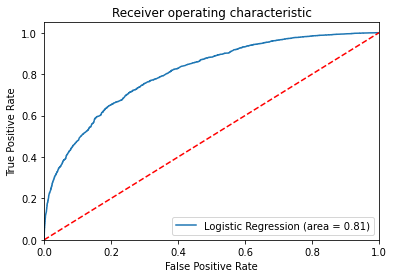

In [48]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [49]:
for i in ["BCN_over_barri_satisfaction_of_living"]:
    del x_resampled[i]

In [50]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.529751
         Iterations 7
                                                 Results: Logit
Model:                        Logit                                        Pseudo R-squared:           0.236     
Dependent Variable:           Would_not_stay_in_the_neighborhood           AIC:                        20637.9828
Date:                         2021-04-25 17:21                             BIC:                        20992.2551
No. Observations:             19394                                        Log-Likelihood:             -10274.   
Df Model:                     44                                           LL-Null:                    -13443.   
Df Residuals:                 19349                                        LLR p-value:                0.0000    
Converged:                    1.0000                                       Scale:                      1.0000    
No. Iterations:               7.0000

In [51]:
result.pvalues.sort_values(ascending=False)

CITIZEN SECURITY IN THE NEIGHBORHOOD_I DON'T KNOW / NO ANSWER        8.423788e-01
Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER                8.329327e-01
Barri_evolution_IT IS WORSE                                          8.844394e-02
Barri_comparison_I DON'T KNOW / NO ANSWER                            2.693446e-02
Barri_transport_I DON'T KNOW / NO ANSWER                             2.565320e-02
GREEN AREAS_BAD                                                      1.754443e-02
Barri_transport_BAD                                                  1.238154e-02
PUBLIC LIGHTING_BAD                                                  1.236785e-02
BUS_BAD                                                              4.498856e-03
BCN_over_barri_transport                                             3.408185e-03
PUBLIC LIGHTING_I DON'T KNOW / NO ANSWER                             8.785213e-04
Social_class_HIGH                                                    4.610036e-05
Owns_a_car      

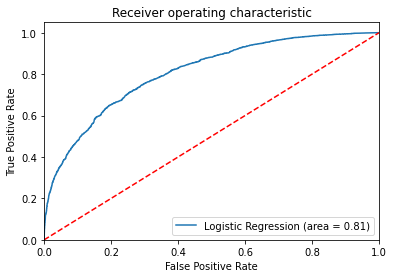

In [52]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [54]:
display(result.get_margeff().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                Logit Marginal Effects               
=====================================================
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
====================================================================================================================================
                                                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Gender                                                              -0.0453      0.007     -6.894      0.000      -0.058      -0.032
Owns_a_car                                                          -0.0290      0.007     -4.088      0.000      -0.043      -0.015
Living_alone                                                        -0.0964      0.008    -12.457      0.000      -0.112      -0.081
BCN_over_barri_evolution                                            -0.1315      0.012    -11.233      0.000      -0.154      -0.109
BCN_over_barri_transport                                             0.0432      0.015      2.931      0.003       0.014       0.072
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE CITY                -0.3360      0.013    -24.951      0.000      -0.362      -0.310
Time_living_in_barri_MORE THAN 10 YEARS                             -0.2188      0.011    -19.983      0.000      -0.240      -0.197
Barri_evolution_I DON'T KNOW / NO ANSWER                            -0.3329      0.060     -5.518      0.000      -0.451      -0.215
Barri_evolution_IT IS THE SAME                                      -0.0694      0.008     -8.835      0.000      -0.085      -0.054
Barri_evolution_IT IS WORSE                                          0.0165      0.010      1.704      0.088      -0.002       0.035
Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER               -0.0172      0.081     -0.211      0.833      -0.177       0.142
Barri_satisfaction_of_living_NOT SATISFIED                           0.1775      0.010     17.777      0.000       0.158       0.197
Barri_comparison_I DON'T KNOW / NO ANSWER                           -0.0798      0.036     -2.213      0.027      -0.150      -0.009
Barri_comparison_NEITHER THE BEST, NOR THE WORST                     0.1817      0.006     30.897      0.000       0.170       0.193
Barri_comparison_ONE OF THE WORST                                    0.3366      0.016     20.894      0.000       0.305       0.368
GREEN AREAS_BAD                                                     -0.0230      0.010     -2.376      0.017      -0.042      -0.004
GREEN AREAS_I DON'T KNOW / NO ANSWER                                -0.2299      0.029     -8.045      0.000      -0.286      -0.174
PUBLIC LIGHTING_BAD                                                 -0.0330      0.013     -2.503      0.012      -0.059      -0.007
PUBLIC LIGHTING_I DON'T KNOW / NO ANSWER                            -0.1672      0.050     -3.330      0.001      -0.266      -0.069
ASPHALT AND STREET CONSERVATION_BAD                                 -0.0604      0.009     -6.537      0.000      -0.078      -0.042
ASPHALT AND STREET CONSERVATION_I DON'T KNOW / NO ANSWER            -0.3190      0.068     -4.690      0.000      -0.452      -0.186
CIRCULATION_BAD                                                     -0.0520      0.007     -7.270      0.000      -0.066      -0.038
CIRCULATION_I DON'T KNOW / NO ANSWER                                -0.2158      0.024     -8.900      0.000      -0.263      -0.168
BUS_BAD                                                             -0.0375      0.013     -2.843      0.004      -0.063      -0.012
BUS_I DON'T KNOW / NO ANSWER                                        -0.2909      0.031     

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()